In [156]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import networkx as nx

import pdfplumber

from PIL import Image
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from itertools import combinations
from collections import Counter
import re

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords, brown
from nltk.stem.wordnet import WordNetLemmatizer
import spacy

from textblob import TextBlob

from tqdm import trange
import requests
from bs4 import BeautifulSoup

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
eng_stopwords = stopwords.words("english")
Tokenizer = RegexpTokenizer(r"[A-Za-z0-9-]+")
wl=WordNetLemmatizer()
nlp = spacy.load('en_core_web_lg')

## Preparing data

In [4]:
pages = []
with pdfplumber.open("KG.pdf") as pdf:
    for i in trange(12, 273):
        pages.append(pdf.pages[i].extract_text())

100%|████████████████████████████████████████████████████████████████████████████████| 261/261 [01:08<00:00,  3.82it/s]


In [5]:
letter = 'A'
chapter = ''
chapters = []
for page in pages:
    if page[:6].replace('\n', '').replace(' ', '') == letter:
        chapters.append(chapter)
        chapter = ''
        letter = chr(ord(letter) + 1)     
    else:
        chapter += page
        
    if page == pages[-1]:
        chapters.append(chapter)
        
chapters = chapters[1:]

In [6]:
pages = [page.replace('\n', '') for page in pages]
chapters = [chapter.replace('\n', '') for chapter in chapters]
all_text = ' '.join(pages)
all_sentences = nltk.tokenize.sent_tokenize(all_text)

In [7]:
f'Number of chapters (one for each letter): {len(chapters)}, number of pages: {len(pages)}'

'Number of chapters (one for each letter): 26, number of pages: 261'

## Number of characters

In [8]:
counter = dict(Counter(re.sub('[^a-z]', '', all_text.lower())))
counter = dict(sorted(counter.items(), key=lambda item: item[0]))

Text(0.5, 0, 'Letters')

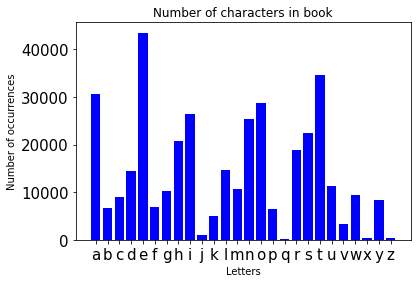

In [144]:
plt.bar(range(len(counter)), list(counter.values()), align='center', color='blue')
plt.xticks(range(len(counter)), list(counter.keys()))
plt.title('Number of characters in book')
plt.ylabel('Number of occurrences')
plt.xlabel('Letters')

## Number of words per one page

In [10]:
number_of_words = []
for i in range(len(pages)):
    words = pages[i].split(' ')
    words = [word for word in words if word != '']
    number_of_words.append(len(words))

(array([17., 16.,  5.,  3.,  1.,  1.,  4.,  3.,  9.,  4.,  7.,  4.,  3.,
         2., 10.,  7., 11.,  8., 13.,  7.,  5.,  7., 14.,  2.,  4., 12.,
        12.,  5.,  4.,  8., 13.,  3.,  8.,  5.,  4., 11.,  2.,  5.,  1.,
         1.]),
 array([  0.  ,  17.75,  35.5 ,  53.25,  71.  ,  88.75, 106.5 , 124.25,
        142.  , 159.75, 177.5 , 195.25, 213.  , 230.75, 248.5 , 266.25,
        284.  , 301.75, 319.5 , 337.25, 355.  , 372.75, 390.5 , 408.25,
        426.  , 443.75, 461.5 , 479.25, 497.  , 514.75, 532.5 , 550.25,
        568.  , 585.75, 603.5 , 621.25, 639.  , 656.75, 674.5 , 692.25,
        710.  ]),
 <BarContainer object of 40 artists>)

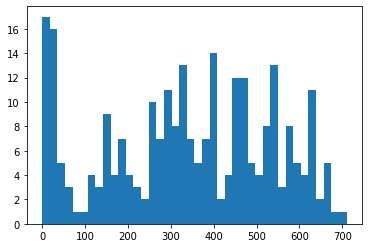

In [11]:
plt.hist(number_of_words, bins=40)

## Number of sentences per one page

In [12]:
number_of_sentences = []
for i in range(len(pages)):
    sentences = pages[i].replace(' ', '').split('.')
    sentences = [sentence for sentence in sentences if sentence != '']
    if len(sentences) > 1:      
        number_of_sentences.append(len(sentences))

(array([ 9.,  3.,  0.,  1.,  7.,  7.,  7.,  6.,  6., 10., 10.,  4.,  4.,
        16., 17.,  9., 13.,  5.,  9.,  4.,  6.,  8.,  7.,  8.,  4.,  4.,
         8.,  3.,  5., 12.,  5.,  2.,  4.,  2.,  2.,  2.,  0.,  1.,  0.,
         2.]),
 array([ 2.   ,  4.075,  6.15 ,  8.225, 10.3  , 12.375, 14.45 , 16.525,
        18.6  , 20.675, 22.75 , 24.825, 26.9  , 28.975, 31.05 , 33.125,
        35.2  , 37.275, 39.35 , 41.425, 43.5  , 45.575, 47.65 , 49.725,
        51.8  , 53.875, 55.95 , 58.025, 60.1  , 62.175, 64.25 , 66.325,
        68.4  , 70.475, 72.55 , 74.625, 76.7  , 78.775, 80.85 , 82.925,
        85.   ]),
 <BarContainer object of 40 artists>)

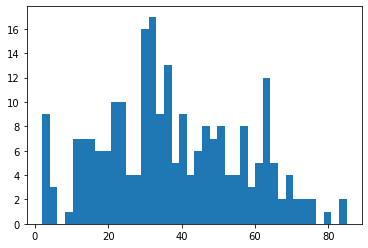

In [13]:
plt.hist(number_of_sentences, bins=40)

## The most common words used in the book

In [14]:
def finding_words(all_text):
    words = all_text.split(' ')
    words = [word for word in words if word != '']
    cleaned_words = []
    for word in words:
        word = word.lower()
        word = Tokenizer.tokenize(word)  
        if len(word) > 0:
            word = [wl.lemmatize(word[0], 'v')]
            word = word if word[0] not in eng_stopwords else ['']
            word = word if len(word[0])>2 else ['']
            
            cleaned_words.append(word[0])

    cleaned_words = [word for word in cleaned_words if word != ['']]
    cleaned_words = [word for word in cleaned_words if word != '']
    
    return cleaned_words

In [15]:
def find_the_most_common_words(comments, limit=15):
    x = Counter(comments).most_common()[:limit]
    words = list(zip(*x))[0]
    occurrences = list(zip(*x))[1]
    
    return words, occurrences

In [16]:
cleaned_words = finding_words(all_text)

In [17]:
words, occurrences = find_the_most_common_words(cleaned_words, limit=15)

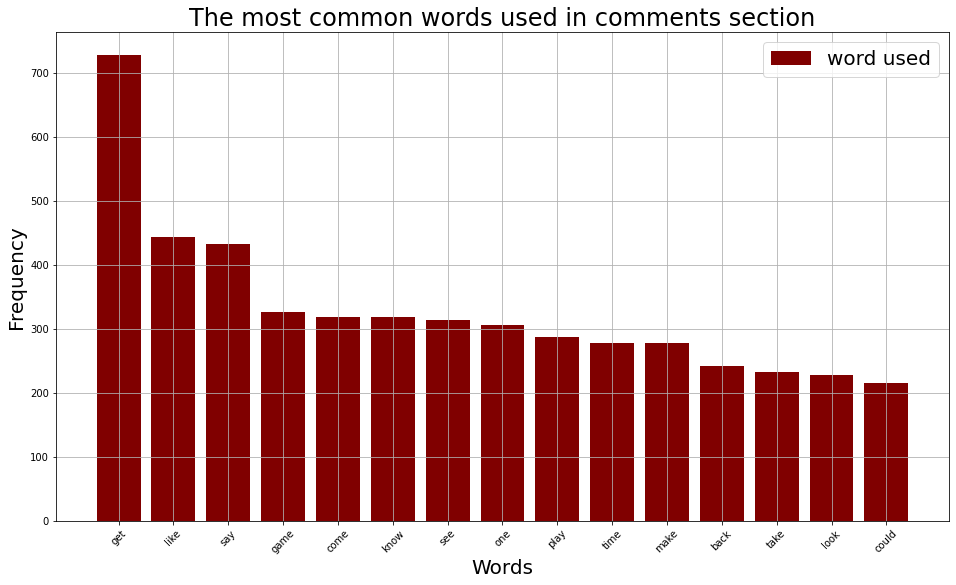

In [18]:
plt.figure(figsize=(16, 9))
plt.title('The most common words used in comments section', fontsize=24)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.bar(words, occurrences, color='maroon')
plt.legend(['word used'], prop={'size': 20})
plt.xticks(rotation=45)
plt.grid()

## How often do the most common words appear in a single chapter?

In [19]:
top_five = list(words[:5])

In [20]:
counters_for_words = []
for word in top_five:
    counters = []
    for chapter in chapters:
        counters.append(finding_words(chapter).count(word))
        
    counters_for_words.append(counters)

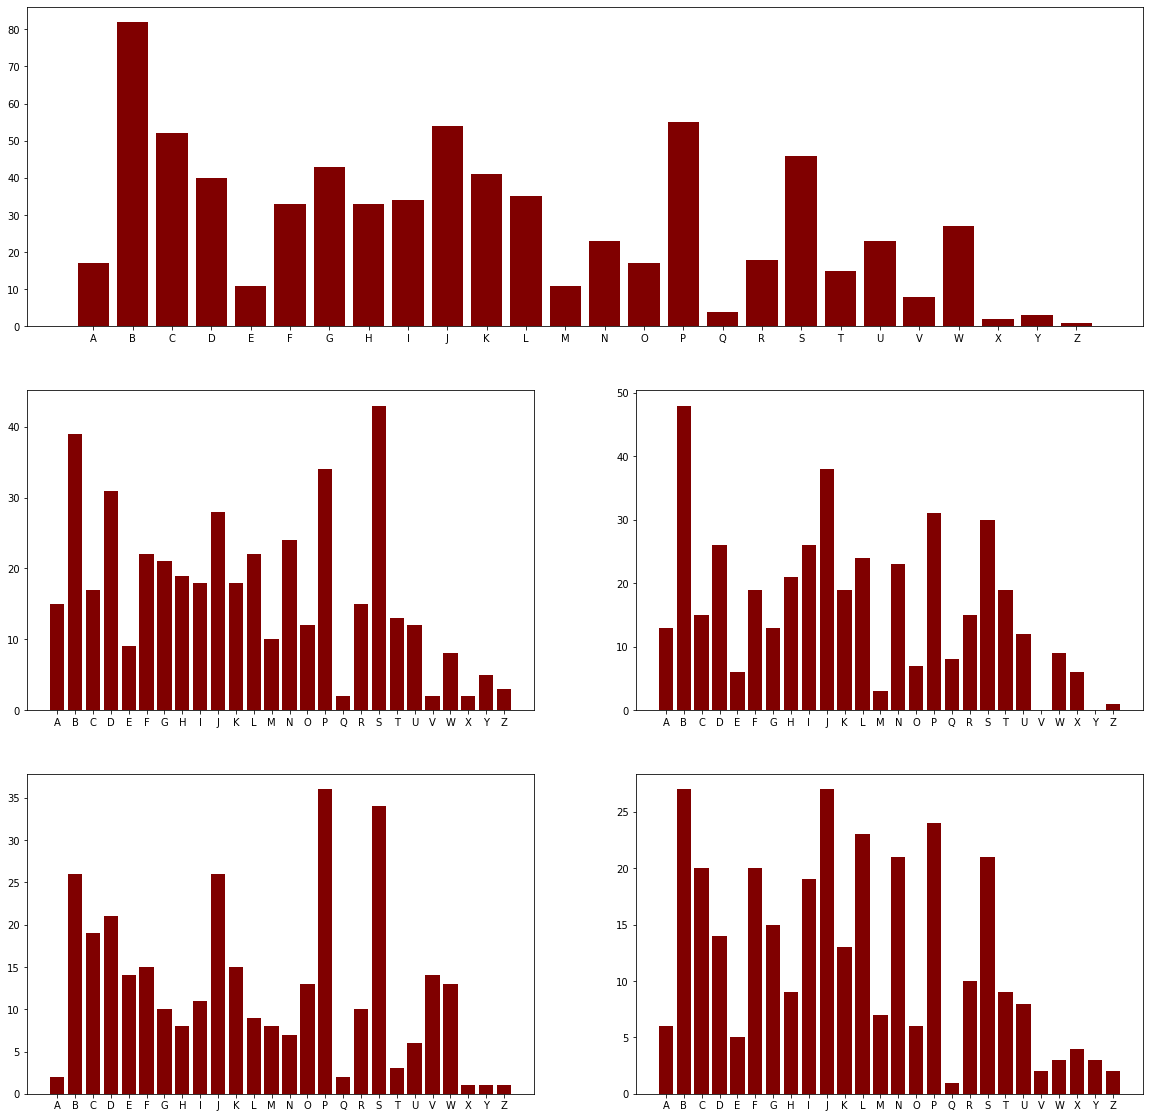

In [21]:
plt.figure(figsize=(20, 20))
for i in range(len(top_five)):
    if i == 0:
        plt.subplot(3, 1, i+1)
    else:
        plt.subplot(3, 2, i+2)
    plt.bar([chr(j) for j in range(65, 91)], counters_for_words[i], color='maroon')

## The most common noun phrases used in the book

-> maybe RegexpParser is better? - to check

In [22]:
def finding_noun_phrases(comments):
    noun_phrases_comments = []
    cleaned_comments = []
    wl=WordNetLemmatizer()
    for comment in comments:
        comment = comment.lower()
        comment = Tokenizer.tokenize(comment)
        comment = [word for word in comment if word not in eng_stopwords]
        comment = [word for word in comment if len(word)>2] 
        comment = " ".join(comment)
        comment = TextBlob(comment)
        comment = comment.noun_phrases   
        noun_phrases_comments.append(comment)

    noun_phrases_comments_combined = [word for sublist in noun_phrases_comments for word in sublist]
    
    return noun_phrases_comments_combined

In [23]:
def find_the_most_common_noun_phrases(comments, limit=15):
    x = Counter(comments).most_common()[:limit] 
    x = [phrase for phrase in x if phrase[0] != 'gon na']
    x = [phrase for phrase in x if phrase[0] != 'wan na']
    x = [phrase for phrase in x if len(phrase[0].split(' '))==2]
    words = list(zip(*x))[0]
    occurrences = list(zip(*x))[1]
    
    return words, occurrences

In [24]:
words, occurrences = find_the_most_common_noun_phrases(finding_noun_phrases(chapters))

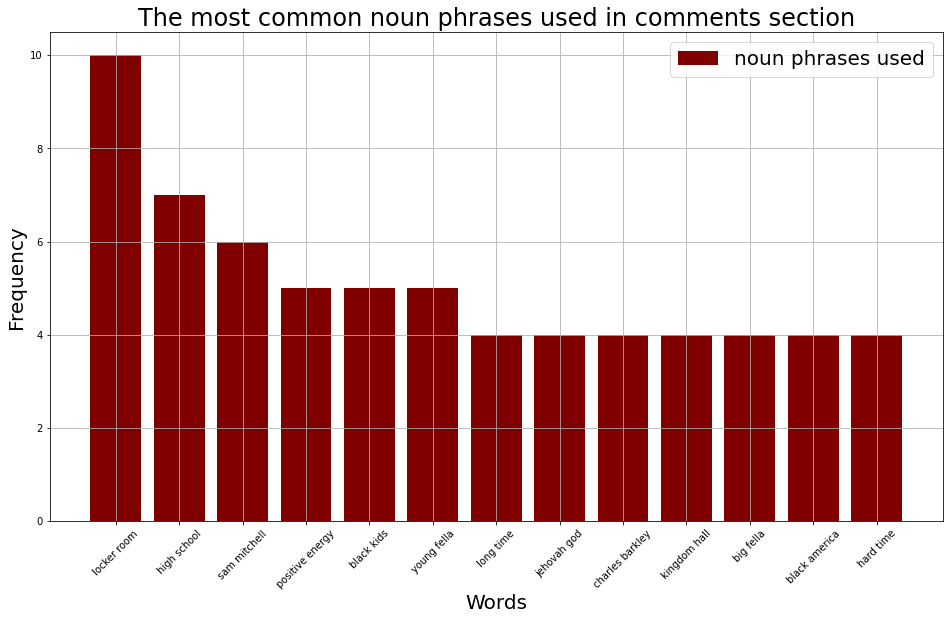

In [25]:
plt.figure(figsize=(16, 9))
plt.title('The most common noun phrases used in comments section', fontsize=24)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.bar(words, occurrences, color='maroon')
plt.legend(['noun phrases used'], prop={'size': 20})
plt.xticks(rotation=45)
plt.grid()

In [26]:
len(all_sentences)

8218

## Top words in each category of part of the speech

Spacy POS description: https://machinelearningknowledge.ai/tutorial-on-spacy-part-of-speech-pos-tagging/

In [27]:
POS = ['VERB', 'PRON', 'DET', 'NOUN', 'ADP', 'ADJ', 'PUNCT', 'ADV', 'NUM']
for item in POS:
    print(f"{item}: {spacy.explain(item)}")

VERB: verb
PRON: pronoun
DET: determiner
NOUN: noun
ADP: adposition
ADJ: adjective
PUNCT: punctuation
ADV: adverb
NUM: numeral


In [28]:
spacy_pos_tagged = []
for sentence in all_sentences:
    spacy_pos_tagged.extend([(word, word.pos_) for word in nlp(sentence)])

In [29]:
def get_pos_tag(words, tag, limit):
    pos_tag_words = []
    for word_tag in words:
        if word_tag[1] == tag:
            if word_tag[1] == 'VERB':            
                word = wl.lemmatize(str(word_tag[0]), 'v')          
            else:
                word = word_tag[0]
            if str(word) != '’s' and str(word) != '’m':
                pos_tag_words.append(str(word).lower())
    
    most_common = Counter(pos_tag_words).most_common()[:limit]
                 
    return most_common

In [30]:
for item in POS:
    print(item, get_pos_tag(spacy_pos_tagged, item, 15), '\n')

VERB [('get', 705), ('have', 546), ('go', 438), ('say', 429), ('do', 357), ('come', 319), ('know', 314), ('see', 313), ('make', 263), ('play', 259), ('take', 219), ('look', 202), ('want', 178), ('give', 158), ('think', 145)] 

PRON [('i', 3091), ('you', 1123), ('it', 1069), ('he', 1034), ('my', 934), ('me', 870), ('that', 637), ('we', 533), ('his', 506), ('they', 393), ('him', 308), ('who', 290), ('what', 269), ('your', 254), ('us', 177)] 

DET [('the', 4252), ('a', 1890), ('that', 339), ('all', 205), ('no', 195), ('an', 172), ('this', 170), ('some', 139), ('those', 128), ('every', 94), ('another', 68), ('these', 65), ('any', 44), ('each', 33), ('both', 11)] 

NOUN [('time', 256), ('game', 228), ('way', 160), ('shit', 137), ('life', 121), ('team', 117), ('man', 106), ('league', 102), ('brothas', 98), ('years', 96), ('thing', 92), ('players', 90), ('people', 85), ('year', 84), ('world', 84)] 

ADP [('in', 1377), ('of', 1347), ('to', 945), ('on', 635), ('with', 613), ('for', 548), ('up',

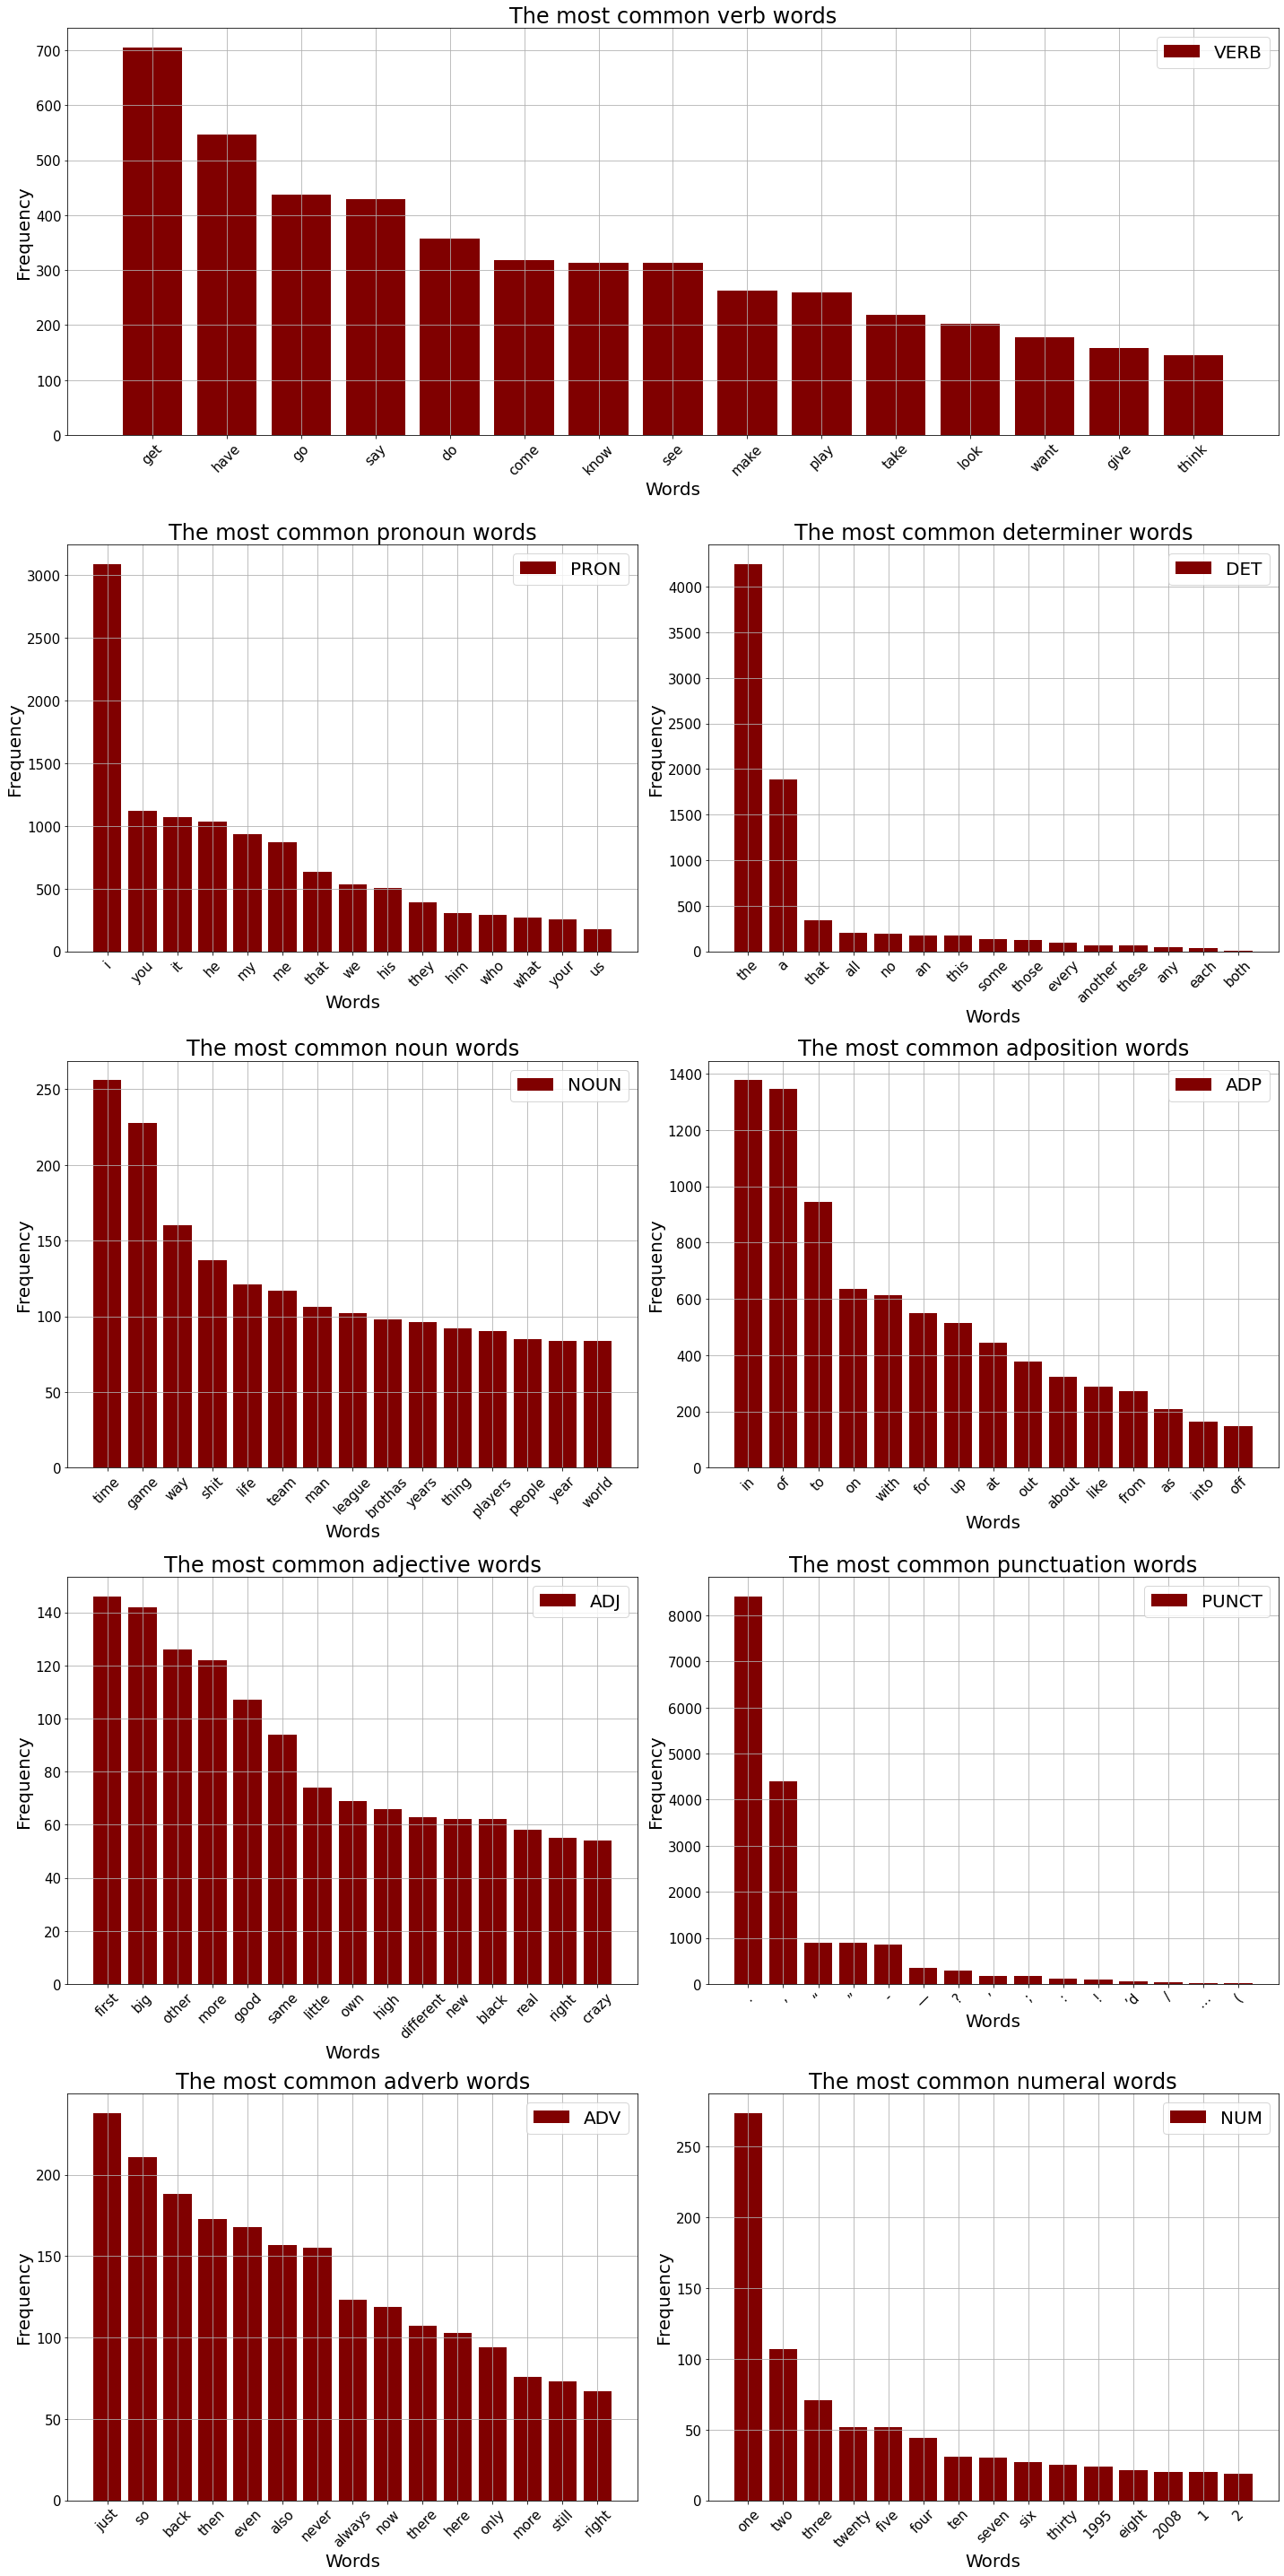

In [31]:
plt.figure(figsize=(20, 40))
plt.rc("ytick", labelsize=15)
plt.rc("xtick", labelsize=15)
for i, item in enumerate(POS):
    most_common = get_pos_tag(spacy_pos_tagged, item, 15)
    words = list(zip(*most_common))[0]
    occurrences = list(zip(*most_common))[1]
        
    if i == 0:
        plt.subplot(5, 1, i+1)
    else:
        plt.subplot(5, 2, i+2)

    plt.title(f"The most common {spacy.explain(item)} words", fontsize=24)
    plt.xlabel('Words', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    plt.bar(words, occurrences, color='maroon')
    plt.legend([item], prop={'size': 20})
    plt.xticks(rotation=45)
    plt.grid()
plt.tight_layout()

## Finding names of basketball players

In [32]:
def get_human_names(text):
    """
    Finds all names and surnames in a book using nltk library
    
    Input:
        text: str - a single chapter of a book "Around the world in 80 days"
        
    Output:
        person_list: list - list of words classified as a city    
    """
    tokens = nltk.tokenize.word_tokenize(text)
    pos = nltk.pos_tag(tokens)
    sentt = nltk.ne_chunk(pos, binary = False)
    person_list = []
    person = []
    name = ""
    for subtree in sentt.subtrees(filter=lambda t: t.label() == 'PERSON'):
        for leaf in subtree.leaves():
            person.append(leaf[0])
        if len(person) > 1:
            for part in person:
                name += part + ' '
            person_list.append(name[:-1])
            name = ''
        person = []

    return person_list

In [33]:
possible_players = Counter(get_human_names(all_text)).most_common()

In [34]:
url = 'https://www.basketball-reference.com/search/search.fcgi?search='
basketball_players = []
for player in possible_players:
    content = requests.get(url+player[0])
    soup = BeautifulSoup(content.text, 'html.parser')
    if 'Found 0 hits that match your search' not in soup.text and player[0] in soup.text and player != 'Hot Dog':
        basketball_players.append(player[0]) 

In [35]:
basketball_players

['Sam Mitchell',
 'Paul Pierce',
 'Kevin McHale',
 'Ronnie Fields',
 'Charles Barkley',
 'John Thompson',
 'Vince Carter',
 'Bill Willoughby',
 'Malik Sealy',
 'Chris Webber',
 'Karl Malone',
 'Sam Cassell',
 'Shaquille O',
 'Derrick Coleman',
 'Kenny G',
 'Bill Russell',
 'Rasheed Wallace',
 'Kevin Garnett',
 'Larry Bird',
 'Gary Payton',
 'Ray Allen',
 'Alonzo Mourning',
 'Patrick Ewing',
 'Arvydas Sabonis',
 'Scottie Pippen',
 'Antoine Walker',
 'Glen Davis',
 'Terrell Brandon',
 'Shammond Williams',
 'Allen Iverson',
 'Leon Powe',
 'Mr. Basketball',
 'Terry Lewis',
 'Pat Riley',
 'Dwight Howard',
 'Joe Smith',
 'Jason Kidd',
 'Dawn Staley',
 'James Brown',
 'Kendrick Perkins',
 'Magic Johnson',
 'Doc Rivers',
 'Chris Bosh',
 'Tim Hardaway',
 'North Carolina',
 'Michael Jordan',
 'Flip Saunders',
 'Antonio McDyess',
 'Tyronn Lue',
 'Derrick Rose',
 'Zach Randolph',
 'Candace Parker',
 'Jason Collins',
 'Dennis Rodman',
 'Shareef Abdur-Rahim',
 'Jelani McCoy',
 'Ron Mercer',
 'Tracto

## Number of basketball players mentions pro page/chapter

In [36]:
occurrences = []
for page in pages:
    occurrence = 0
    for player in basketball_players:
        occurrence += page.count(player)
        
    occurrences.append(occurrence)

(array([93., 50., 34., 28., 19., 10.,  8.,  7.,  2.,  2.,  4.,  1.,  0.,
         1.,  1.,  0.,  1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17.]),
 <BarContainer object of 17 artists>)

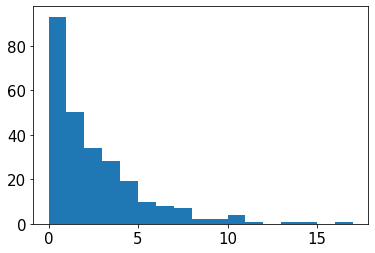

In [37]:
plt.hist(occurrences, bins=max(occurrences))

In [38]:
occurrences = []
for chapter in chapters:
    occurrence = 0
    for player in basketball_players:
        occurrence += chapter.count(player)
        
    occurrences.append(occurrence)

(array([5., 3., 3., 5., 2., 2., 2., 1., 1., 2.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <BarContainer object of 10 artists>)

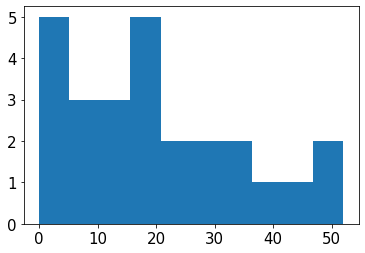

In [39]:
plt.hist(occurrences)

In [40]:
biography_words = ['I', 'me', 'my', 'mine', 'Kevin Garnett', 'Big Ticket', 'KG']

In [41]:
occurrences = []
for page in pages:
    occurrence = 0
    for word in biography_words:
        occurrence += page.count(word)
        
    occurrences.append(occurrence)

(array([51., 29., 47., 50., 28., 27., 21.,  5.,  2.,  1.]),
 array([ 0. ,  9.6, 19.2, 28.8, 38.4, 48. , 57.6, 67.2, 76.8, 86.4, 96. ]),
 <BarContainer object of 10 artists>)

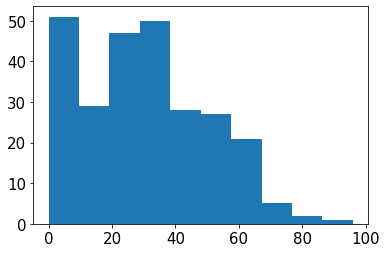

In [42]:
plt.hist(occurrences)

In [43]:
occurrences = []
for chapter in chapters:
    occurrence = 0
    for word in biography_words:
        occurrence += chapter.count(word)
        
    occurrences.append(occurrence)

(array([5., 1., 4., 5., 6., 1., 0., 2., 0., 2.]),
 array([ 21. ,  94.2, 167.4, 240.6, 313.8, 387. , 460.2, 533.4, 606.6,
        679.8, 753. ]),
 <BarContainer object of 10 artists>)

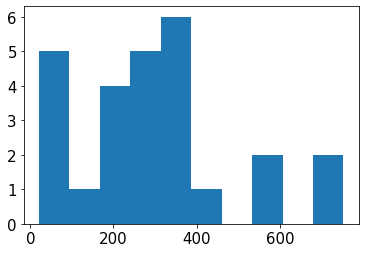

In [44]:
plt.hist(occurrences)

## Graph of co-occurences (defined as mentions on the same page)

In [77]:
def find_basketball_players(text, basketball_players):
    found = []
    for player in basketball_players:
        if player in text:
            found.append(player)
            
    return None if len(found) <= 1 else found

In [78]:
df = pd.DataFrame(pages, columns={'Pages'})
df['Basketball Players'] = df.apply(lambda row: find_basketball_players(row.Pages, basketball_players), axis=1)
#df = df.explode('Basketball Players')
df = df[~df['Basketball Players'].isnull()]

In [126]:
edges = []
co_occurrences = list(df['Basketball Players'])
for co_occurrence in co_occurrences:
    for coop in combinations(co_occurrence, 2):
        edges.append(tuple(sorted(coop)))
        
edges_count = Counter(edges)
mod_edges_count = dict()
links = []
for key, value in edges_count.items():
    links.append([key[0], key[1], value])
    mod_edges_count[(key[0], key[1])] = value

In [127]:
modified_links = []
mod_edges_count = dict()
for link in links:
    if link[2] > 1:
        modified_links.append(link)
        mod_edges_count[(link[0], link[1])] = link[2]

In [130]:
def create_graph(links, edges_count):
    G = nx.Graph()
    G.add_weighted_edges_from(links)
    
    weights = [G[u][v]['weight'] for u,v in G.edges]
    d = dict(G.degree)
    
    low, *_, high = sorted(d.values())
    norm = cm.colors.Normalize(vmin=low, vmax=high, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap='Wistia')
    
    plt.figure(figsize=(20, 10))
    pos=nx.shell_layout(G)
    nx.draw(G, pos, nodelist=d.keys(), node_size=[v * 100 for v in d.values()], node_color=[mapper.to_rgba(i) for i in d.values()])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_count)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_color='darkgreen')
    
    return G

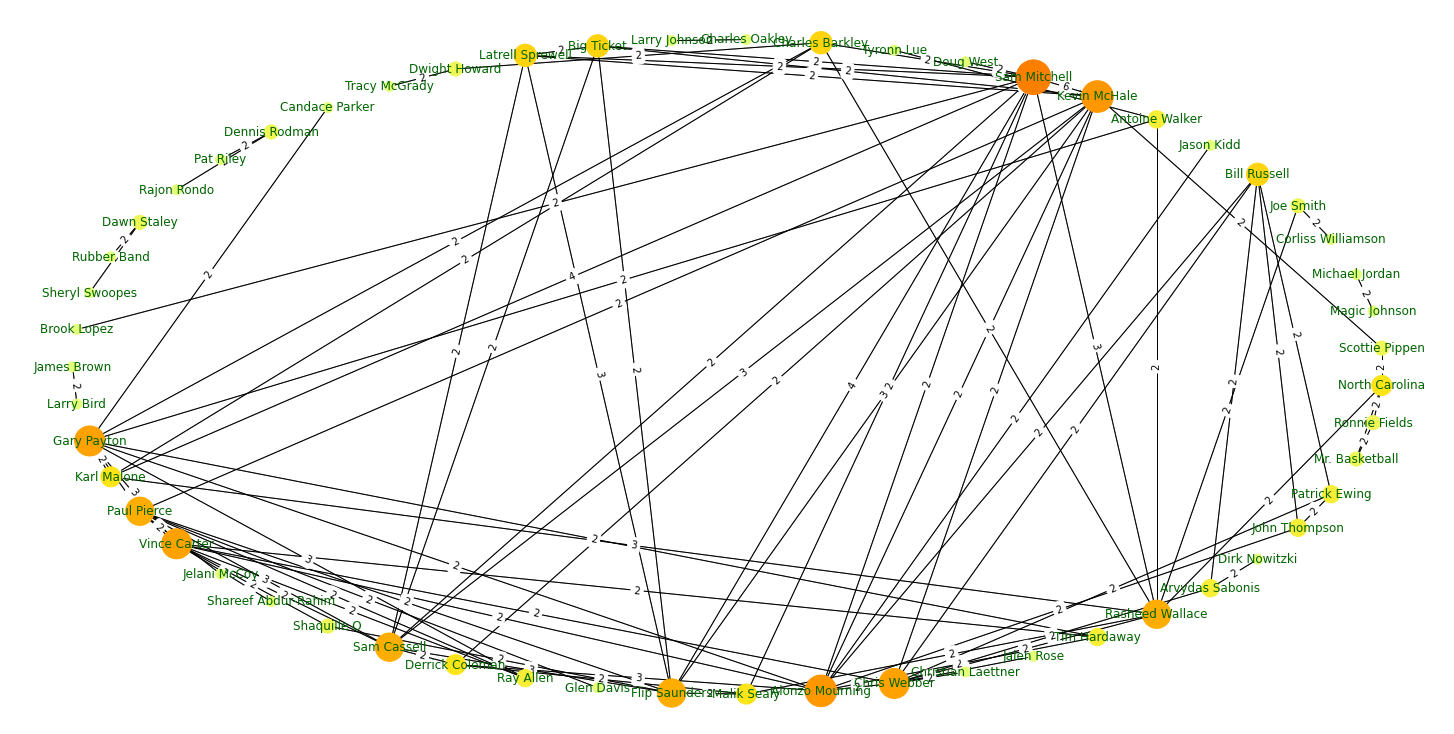

In [132]:
create_graph(modified_links, mod_edges_count)

## Graph of co-occurences (defined as mentions on the same chapter)

## Sentiment analysis of every chapter

In [157]:
analyser = SentimentIntensityAnalyzer()

In [161]:
def sentiment(text):
    sentence_sentiment = analyser.polarity_scores(text)
    
    return sentence_sentiment['compound']

In [177]:
df = pd.DataFrame({'Chapter': [],
                   'Sentence index': [],
                   'Sentence': []})

for i, chapter in enumerate(chapters):
    a_list = nltk.tokenize.sent_tokenize(chapter)
    df = df.append(pd.DataFrame({'Chapter': [i+1]*len(a_list), 'Sentence index': range(1, len(a_list)+1), 'Sentence': a_list}), ignore_index=True)
    
df['Chapter'] = df['Chapter'].astype(int)
df['Sentence index'] = df['Sentence index'].astype(int)

df['Sentiment'] = df.apply(lambda row: sentiment(row.Sentence), axis=1)
df['Words'] = df.apply(lambda row: finding_words(row.Sentence), axis=1)

<AxesSubplot:xlabel='Chapter'>

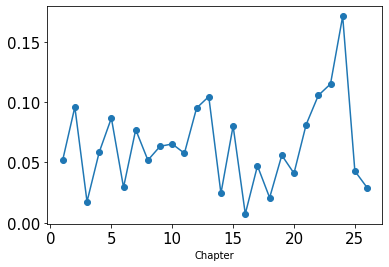

In [178]:
df.groupby('Chapter').mean()['Sentiment'].plot(marker='o')

In [180]:
negative = len(df[df['Sentiment'] < -0.05])
positive = len(df[df['Sentiment'] > 0.05])
neutral = len(df) - positive - negative

<BarContainer object of 3 artists>

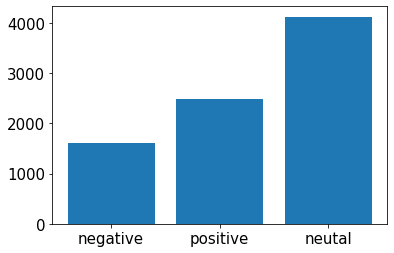

In [181]:
plt.bar(['negative', 'positive', 'neutal'], [negative, positive, neutral])

In [204]:
negative_words = list(df[df['Sentiment'] < -0.05]['Words'])
positive_words = list(df[df['Sentiment'] > 0.05]['Words'])

In [205]:
negative_words = [word for negative_word in negative_words for word in negative_word]
positive_words = [word for positive_word in positive_words for word in positive_word]

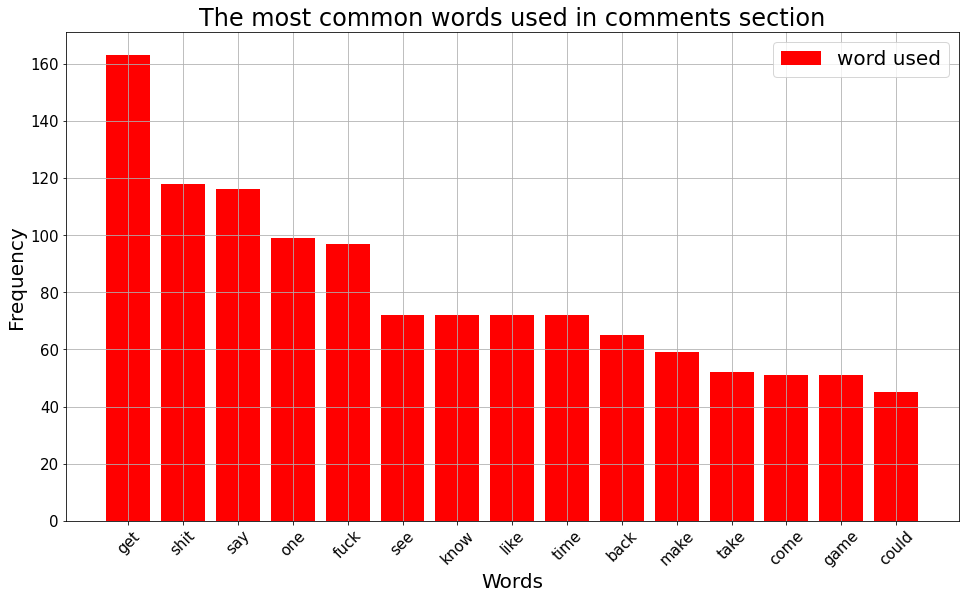

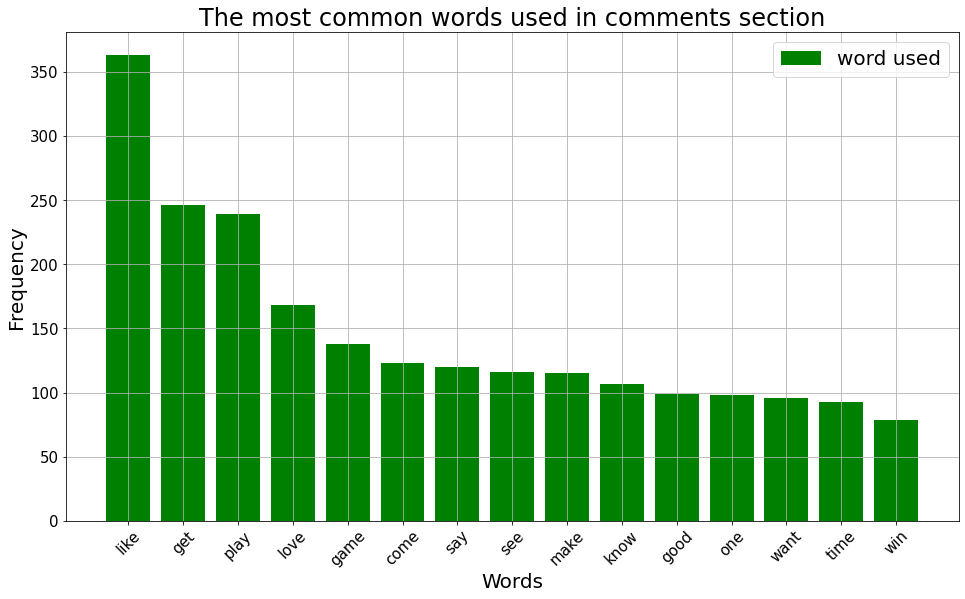

In [206]:
words, occurrences = find_the_most_common_words(negative_words, limit=15)

plt.figure(figsize=(16, 9))
plt.title('The most common words used in comments section', fontsize=24)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.bar(words, occurrences, color='red')
plt.legend(['word used'], prop={'size': 20})
plt.xticks(rotation=45)
plt.grid()

words, occurrences = find_the_most_common_words(positive_words, limit=15)

plt.figure(figsize=(16, 9))
plt.title('The most common words used in comments section', fontsize=24)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.bar(words, occurrences, color='green')
plt.legend(['word used'], prop={'size': 20})
plt.xticks(rotation=45)
plt.grid()

## Wordcloud with custom image as a background

In [48]:
cleaned_words = finding_words(all_text)

In [49]:
def generate_wordcloud(data, mask=None):
    data=Counter(data)
    cloud = WordCloud(scale=3,
                      max_words=150,
                      colormap='Oranges',
                      mask=mask,
                      background_color='black',
                      contour_color='white',
                      contour_width=1).generate_from_frequencies(data)
    plt.figure(figsize=(16,16))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

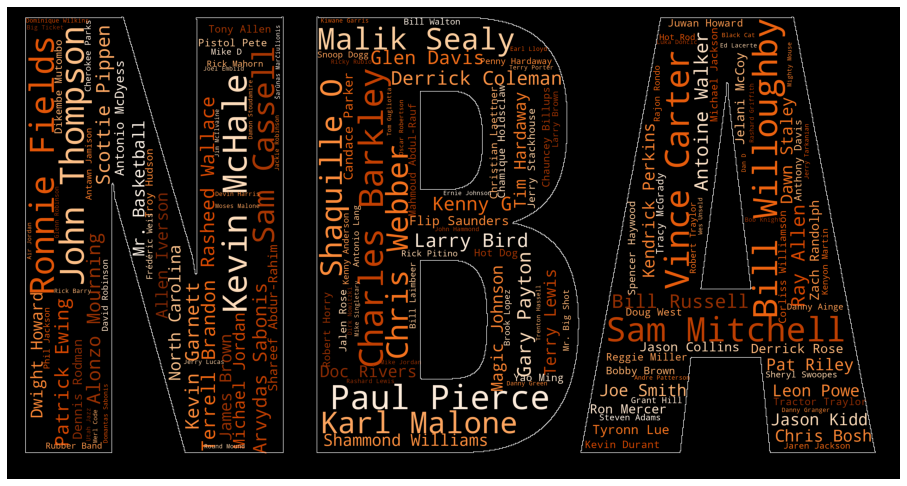

In [50]:
mask = np.array(Image.open('nba.png'))
generate_wordcloud(basketball_players, mask=mask)

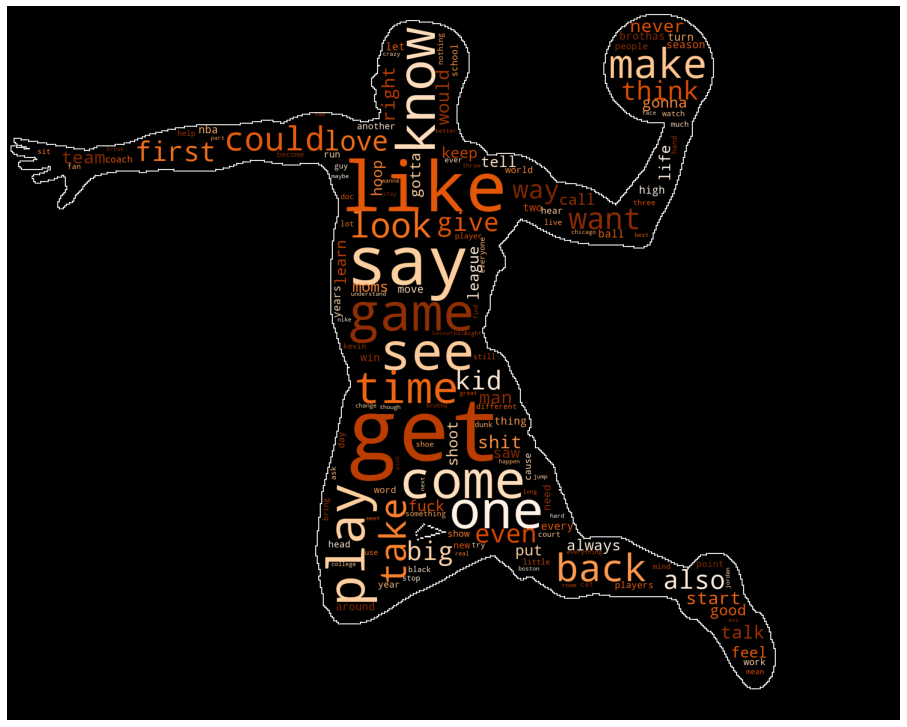

In [51]:
mask = np.array(Image.open('basket1.png'))
generate_wordcloud(cleaned_words, mask=mask)

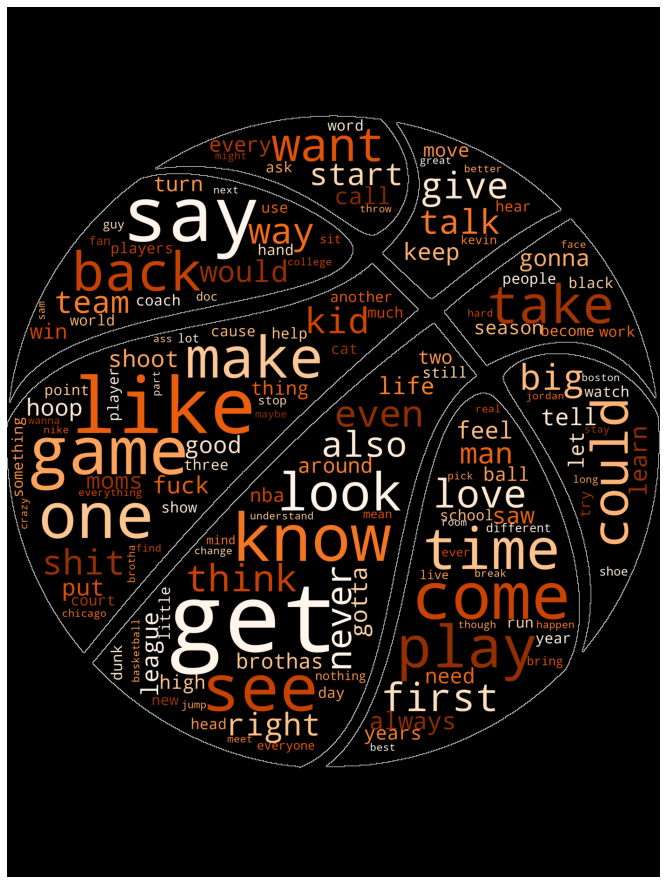

In [52]:
mask = np.array(Image.open('basket2.png'))
generate_wordcloud(cleaned_words, mask=mask)